In [1]:
suppressPackageStartupMessages({library(tidyverse)
library(gganimate)
})

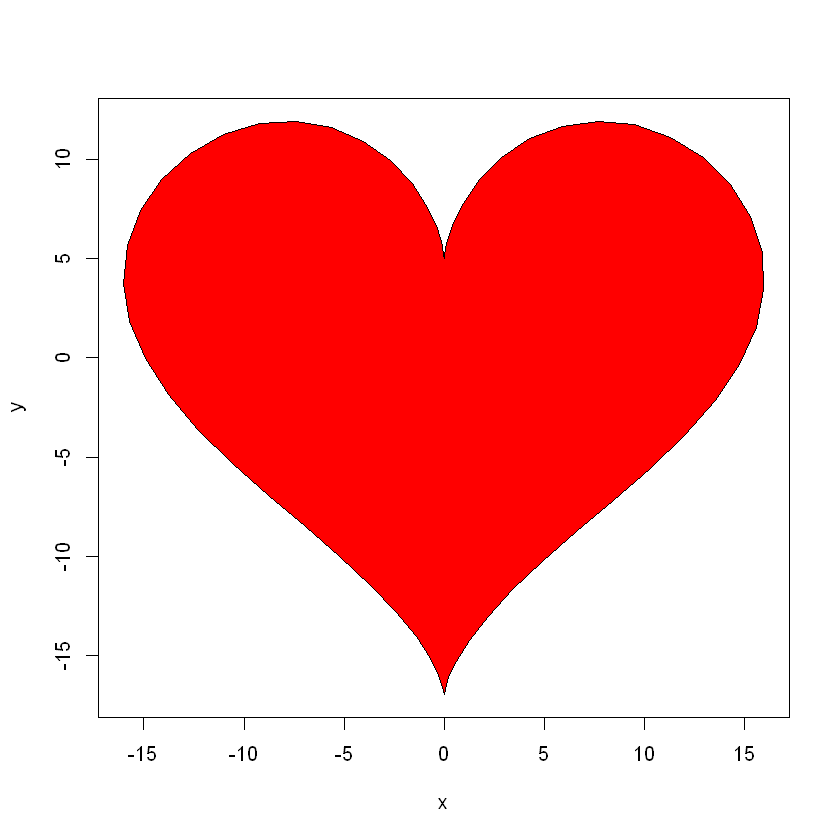

In [1]:
dat <- data.frame(t = seq(0,2*pi,0.1))
xhrt <- function(t){
  16*sin(t)^3
}
yhrt <- function(t){
  13*cos(t)-5*cos(2*t)-2*cos(3*t)-cos(4*t)
}
dat$y <- yhrt(dat$t)
dat$x <- xhrt(dat$t)
with(dat, plot(x,y,type = "l"))
with(dat,polygon(x,y,col = "red"))

In [3]:
seque <- seq(0,2*pi, 0.1)
mat_x <- matrix(nrow = length(seque), ncol = 8)
mat_y <- matrix(nrow = length(seque), ncol = 8)
for(i in 1:ncol(mat_x)){
  mat_x[,i] <- seque
  mat_y[,i] <- seque
}
mat_x <- apply(mat_x,2,xhrt)
mat_y <- apply(mat_y,2,yhrt)
for(i in seq(1,ncol(mat_x),2)){
  mat_x[,i] <- mat_x[,i]*.7
  mat_y[,i] <- mat_y[,i]*.7
}

In [4]:
mat_x <- as.data.frame(mat_x)
mat_y <- as.data.frame(mat_y)
mat_x <- mat_x %>%
  gather(key = "sim", value = "x")
mat_y <- mat_y %>%
  gather(key = "sim", value = "y")
mat_tot <- cbind(mat_x,mat_y$y)
colnames(mat_tot) <- c("sim","x","y")

In [ ]:
plot <- ggplot(mat_tot, aes(x = x, y = y))+
  geom_polygon(fill = "red", col = "black")+
  transition_states(sim)
suppressMessages(anim <- animate(plot, duration = 2))